# CUADERNO REPORTE DE JORNADAS

## HEATMAPS

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import ipywidgets as widgets
from IPython.display import display, clear_output

# Preparar el pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='grass', line_color='white')

# Diccionario con los nombres de las jornadas
nombres_jornadas = {
    "J1": "Jornada 1 - Local vs Universidad Cesar Vallejo",
    "J2": "Jornada 2 - Visita vs Alianza Atlético de Sullana",
    "J3": "Jornada 3 - Local vs Universitario de Deportes",
    "J4": "Jornada 4 - Visita vs Unión Comercio",
}

# Función para cargar los DataFrames de posiciones medias y heatmaps para todas las jornadas
def cargar_datos():
    df_posiciones_medias_total = pd.DataFrame()
    heatmaps_total = {}
    for jornada, nombre_jornada in nombres_jornadas.items():
        try:
            # Cargar el DataFrame de posiciones medias y agregar una columna 'Jornada'
            df_temp = pd.read_csv(f'CSV obtenidos\\{nombre_jornada}_posicion_jugadores.csv')
            df_temp['Jornada'] = jornada  # Añadir columna 'Jornada' con el identificador de la jornada
            df_posiciones_medias_total = pd.concat([df_posiciones_medias_total, df_temp])
            heatmaps_total[jornada] = f'CSV obtenidos\\{jornada}_heatmaps_jugadores.xlsx'
        except FileNotFoundError:
            print(f"No se encontró el archivo para {nombre_jornada}")
    return df_posiciones_medias_total, heatmaps_total

df_posiciones_medias, heatmaps = cargar_datos()

# Función modificada para dibujar los heatmaps y la posición media de un jugador seleccionado en todas las jornadas
def draw_player_heatmaps(jugador):
    clear_output(wait=True)
    num_jornadas = len(heatmaps)
    cols = 2
    rows = -(-num_jornadas // cols)  # Redondeo hacia arriba
    
    fig, axs = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    axs = axs.flatten()
    plot_counter = 0 
    for (jornada, archivo_excel) in (heatmaps.items()):
        with pd.ExcelFile(archivo_excel) as xls:
            if jugador in xls.sheet_names:
                df_heatmap = pd.read_excel(xls, sheet_name=jugador)
                if not df_heatmap.empty :
                    ax = axs[plot_counter]
                    pitch.draw(ax=ax)
                    pitch.kdeplot(df_heatmap['x'], df_heatmap['y'], ax=ax, levels=100, cmap='Blues', fill=True, shade_lowest=True, alpha=0.5)
                
                    fila_jugador = df_posiciones_medias[(df_posiciones_medias['name'] == jugador) & (df_posiciones_medias['Jornada'] == jornada)]
                    if not fila_jugador.empty:
                        pitch.scatter(fila_jugador['averageX'], fila_jugador['averageY'], ax=ax, s=200, color='blue', edgecolors='black', linewidth=2.5, zorder=1)
                        ax.text(fila_jugador['averageY'].values[0], fila_jugador['averageX'].values[0], fila_jugador['jerseyNumber'].values[0], color='white', ha='center', va='center', fontsize=12, zorder=2)
                        ax.set_title(f"{jugador} - {nombres_jornadas[jornada]}", fontsize=14)
                    plot_counter += 1  # Incrementar contador solo si se dibujó el subplot
                
                
    for j in range(plot_counter, rows * cols):
        axs[j].axis('off')
    
    plt.tight_layout()
    plt.show()


# Crear un widget de dropdown para seleccionar el jugador
jugador_selector = widgets.Dropdown(description='Jugador:')
jugador_selector.options = df_posiciones_medias['name'].unique()

# Widget de salida para los gráficos
output = widgets.Output()

# Función para manejar la selección de jugador
@output.capture(clear_output=True)
def update_heatmaps(change):
    draw_player_heatmaps(change['new'])

# Vincular cambios en el widget a la función
jugador_selector.observe(update_heatmaps, names='value')

# Mostrar el widget y output
display(jugador_selector)
display(output)


Dropdown(description='Jugador:', options=('Jesús Castillo', 'Renzo Garces', 'Cecilio Waterman', 'Franco Zanela…

Output()

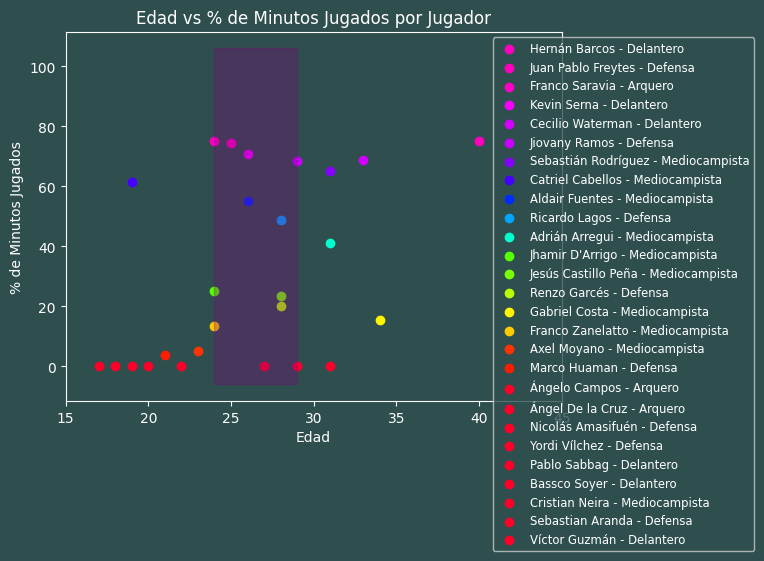

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Leer el archivo xlsx
df = pd.read_excel('ALIANZA LIMA 2024.xlsx')
cantidad_jornadas_jugadas = 4  # Actualizar

minutos_columns = [col for col in df.columns if ' - Minutos' in col]
for col in minutos_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[minutos_columns] = df[minutos_columns].fillna(0)

# Ahora la suma debería funcionar sin errores de tipo
df['Total Minutos'] = df[minutos_columns].sum(axis=1)

# Supongamos que el total de minutos posible (ej., todos los minutos de todas las jornadas) es 360 minutos
total_minutos_posibles = 90 * cantidad_jornadas_jugadas
df['Porcentaje Minutos Jugados'] = (df['Total Minutos'] / total_minutos_posibles) * 100

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
# Definir el colormap
cmap = plt.get_cmap('gist_rainbow')

# Normalizar los datos de porcentaje de minutos jugados para usar en el colormap
norm = mcolors.Normalize(vmin=df['Porcentaje Minutos Jugados'].min(), vmax=df['Porcentaje Minutos Jugados'].max())

for i, row in df.iterrows():
    color = cmap(norm(row['Porcentaje Minutos Jugados']))
    ax.scatter(row['Edad 2024'], row['Porcentaje Minutos Jugados'], color=color, label=row['Nombre Completo'] + ' - ' + row['Posición'])

ax.set_xlabel('Edad')
ax.set_ylabel('% de Minutos Jugados')
ax.set_title('Edad vs % de Minutos Jugados por Jugador')
ax.set_facecolor('darkslategray')
fig.patch.set_facecolor('darkslategray')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='purple',
        alpha=0.3, zorder=2) ##the peak age shaded region

# Establecer los límites del eje x
ax.set_xlim(15, 45)

legend = plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), fontsize='small', facecolor='darkslategray')
for text in legend.get_texts():
    text.set_color('white')
plt.show()


 # Manejo de informacion por jornada